# Elements Of Data Processing (2020S1) - Week 2


# DataFrames

DataFrames represents tabular data structure and can contain multiple rows and columns.  They can be thought of as a dictionary of Series objects, and are one of the most important data structures you will use to store and manipulate information in data science.

A DataFrame has both row and column indices.

The Pandas DataFrame structure contains many useful methods to aid your analysis.  Recall from week 1 the [API reference](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) is available which details all of the functionality provided by pandas.  You will particularly need con consult the [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) reference page.


<img src="images/DF.jpg">


In [1]:
# as before, begin by importing the pandas library
import pandas as pd

In [2]:
# create a new series of the population
Aus_Population = {'1990':17065100, '2000':19153000, '2007':20827600,
                 '2008':21249200,'2009':21691700,'2010':22031750,
                 '2011':22340024, '2012':22728254, '2013':23117353}
population = pd.Series(Aus_Population)

In [3]:
# we will reuse the emissions data from last week
Aus_Emission = {'1990':15.45288167, '2000':17.20060983, '2007':17.86526004,
                '2008':18.16087566,'2009':18.20018196,'2010':16.92095367,
                '2011':16.86260095, '2012':16.51938578, '2013':16.34730205}

co2_Emission = pd.Series(Aus_Emission)

In [4]:
# verify the values in the series
population

1990    17065100
2000    19153000
2007    20827600
2008    21249200
2009    21691700
2010    22031750
2011    22340024
2012    22728254
2013    23117353
dtype: int64

In [5]:
# create a DataFrame object from the series objects
australia = pd.DataFrame({'co2_emission':co2_Emission, 'Population':population})
australia

,co2_emission,Population
1990,15.452882,17065100
2000,17.200610,19153000
2007,17.865260,20827600
2008,18.160876,21249200
2009,18.200182,21691700
2010,16.920954,22031750
2011,16.862601,22340024
2012,16.519386,22728254
2013,16.347302,23117353


In [6]:
# create a DataFrame from a csv file
countries = pd.read_csv('data/countries.csv',encoding = 'ISO-8859-1')

In [7]:
# check the top 10 countries in the DataFrame
countries.head(10) # the default value is set to 5

,Country,Region,IncomeGroup
0,Afghanistan,South Asia,Low income
1,Albania,Europe & Central Asia,Upper middle income
2,Algeria,Middle East & North Africa,Upper middle income
3,American Samoa,East Asia & Pacific,Upper middle income
4,Andorra,Europe & Central Asia,High income
5,Angola,Sub-Saharan Africa,Upper middle income
6,Antigua and Barbuda,Latin America & Caribbean,High income
7,Argentina,Latin America & Caribbean,Upper middle income
8,Armenia,Europe & Central Asia,Lower middle income
9,Aruba,Latin America & Caribbean,High income


In [8]:
# count the number of countries in each region
countries.Region.value_counts()

Europe & Central Asia         58
Sub-Saharan Africa            48
Latin America & Caribbean     42
East Asia & Pacific           37
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64

In [9]:
# set the name of countries as the index
countries.set_index('Country')


,Region,IncomeGroup
Country,,
Afghanistan,South Asia,Low income
Albania,Europe & Central Asia,Upper middle income
Algeria,Middle East & North Africa,Upper middle income
American Samoa,East Asia & Pacific,Upper middle income
Andorra,Europe & Central Asia,High income
...,...,...
Virgin Islands (U.S.),Latin America & Caribbean,High income
West Bank and Gaza,Middle East & North Africa,Lower middle income
"Yemen, Rep.",Middle East & North Africa,Lower middle income


In [10]:
# create a new DataFrame for the CO2 emission from a csv file
emission = pd.read_csv('data/emission.csv',encoding = 'ISO-8859-1')
#emission.head()

In [11]:
# Create a subset of emission dataset for Year 2010
yr2010 = emission['2010']
names  = emission['Country']
yr2010.index = names
type(yr2010)

pandas.core.series.Series

In [12]:
# Sort column values using sort_values 
yr2010.sort_values()


Country
Burundi                      0.022480
Congo, Dem. Rep.             0.030197
Chad                         0.043463
Rwanda                       0.057354
Central African Republic     0.059398
                               ...   
Sint Maarten (Dutch part)         NaN
South Sudan                       NaN
St. Martin (French part)          NaN
Tuvalu                            NaN
Virgin Islands (U.S.)             NaN
Name: 2010, Length: 217, dtype: float64

In [13]:
#Sort column values to find the top countries
yr2010.sort_values(ascending = False)

Country
Qatar                        41.131162
Trinidad and Tobago          36.073741
Kuwait                       29.294309
Aruba                        24.182702
Bahrain                      23.101200
                               ...    
Sint Maarten (Dutch part)          NaN
South Sudan                        NaN
St. Martin (French part)           NaN
Tuvalu                             NaN
Virgin Islands (U.S.)              NaN
Name: 2010, Length: 217, dtype: float64

### <span style="color:blue"> Exercise 1 </span>

- Retrieve the mean, median of CO2 emission generated in 2012 by all countries.
- Retrieve the top 5 countries with the most CO2 emission in 2012. How about the 5 countries with the least emission? (remember that sort_values has an **ascending** parameter that is set to True by default).
- Retrieve the sum of CO2 emission for all years and find the 2 years with the maximum CO2 emission.





In [14]:
##answer here
# CO2 emission generated in 2012 by all countries
yr2012 = emission['2012']
yr2012.index = names
type(yr2012)


pandas.core.series.Series

In [15]:
# mean
yr2012.mean()

5.161476912617647

In [16]:
# median
yr2012.median()

2.7530064495

In [17]:
# top 5 CO2 emitting countries
sorted2012 = yr2012.sort_values(ascending=False)
top5 = sorted2012[:5]
top5

Country
Qatar                  46.697477
Curacao                39.638551
Trinidad and Tobago    33.819694
Kuwait                 29.578729
Brunei Darussalam      23.800884
Name: 2012, dtype: float64

In [18]:
# least CO2 emitting countries
sorted2012 = yr2012.sort_values()
least5 = sorted2012[:5]
least5

Country
Burundi                     0.027888
Congo, Dem. Rep.            0.036414
Chad                        0.042682
Mali                        0.061677
Central African Republic    0.063505
Name: 2012, dtype: float64

In [19]:
res = emission.sum()[1:] # columns To ignore header
res.sort_values(ascending=False)[:2]

#emission_T= emission.transpose()
#res = res.astype(float)
#emission_T.sum(axis=1) # rows
#emission_T.index

2012    1052.94
2007    1025.98
dtype: object

In [20]:
# another solution for the 3rd sub-question
# list comprehension to find the sum of CO2 emission
year = ['1990','2000','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']
sum_per_year = [emission[y].sum() for y in year]
sum_per_year

[734.2376925839999,
 936.682642449,
 1025.9772624969999,
 1023.5284745380001,
 975.0620494310001,
 1010.472087137,
 998.0177672359998,
 1052.941290174,
 1024.685642681,
 0.0,
 0.0,
 0.0]

In [21]:
# create a series object of the sum and sort the values
s = pd.Series(sum_per_year, index= year)
s.sort_values(ascending=False)[:2]

2012    1052.941290
2007    1025.977262
dtype: float64

# More Sort Operations
Pandas allows you to sort your DataFrame by rows/columns as follows:

In [22]:
# Sort column values of a DataFrame
sorted2012 = emission.sort_values( by = '2012',ascending = False )
sorted2012

,Country,1990,2000,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
158,Qatar,24.712027,58.522169,53.672746,46.684906,43.504331,41.131162,42.213752,46.697477,40.462355,NaN,NaN,NaN
50,Curacao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.638551,34.161635,NaN,NaN,NaN
196,Trinidad and Tobago,13.879875,18.844281,36.816763,35.455298,33.952984,36.073741,35.137310,33.819694,34.520237,NaN,NaN,NaN
105,Kuwait,23.466084,27.759023,29.636849,30.581264,30.300789,29.294309,28.102662,29.578729,27.258964,NaN,NaN,NaN
28,Brunei Darussalam,24.105188,14.255144,22.474463,23.950011,20.311171,20.856947,24.272670,23.800884,18.918736,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,San Marino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,St. Martin (French part),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,Tuvalu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Sort column values using two columns
sorted2012 = emission.sort_values( by = ['2012','2013'],ascending = [False, True] )
sorted2012

,Country,1990,2000,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
158,Qatar,24.712027,58.522169,53.672746,46.684906,43.504331,41.131162,42.213752,46.697477,40.462355,NaN,NaN,NaN
50,Curacao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.638551,34.161635,NaN,NaN,NaN
196,Trinidad and Tobago,13.879875,18.844281,36.816763,35.455298,33.952984,36.073741,35.137310,33.819694,34.520237,NaN,NaN,NaN
105,Kuwait,23.466084,27.759023,29.636849,30.581264,30.300789,29.294309,28.102662,29.578729,27.258964,NaN,NaN,NaN
28,Brunei Darussalam,24.105188,14.255144,22.474463,23.950011,20.311171,20.856947,24.272670,23.800884,18.918736,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,San Marino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,St. Martin (French part),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,Tuvalu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Slicing using the .loc and .iloc method
Slicing allows you to take part of your DataFrame.  You can use the .iloc method to select data using row/column numbers, or use .loc to select data using row/column headings.  See [this article](https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/) for more examples

In [24]:
# Slicing using a range of rows and range of columns 
emission.iloc[2:5,2:6]

,2000,2007,2008,2009
2,2.819778,3.195865,3.168524,3.430129
3,NaN,NaN,NaN,NaN
4,8.018181,6.350868,6.296125,6.049173


In [25]:
# Slicing using specific rows and specific columns
emission.loc[[3,5],['Country','1990']]

,Country,1990
3,American Samoa,NaN
5,Angola,0.459698


In [26]:
# Specific rows and all columns

emission.loc[[3,5],:]

,Country,1990,2000,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Angola,0.459698,0.633625,1.311096,1.295687,1.354389,1.369339,1.382752,1.472255,1.384496,NaN,NaN,NaN


In [27]:
# All rows and specific columns
emission.loc[:,['Country','1990']]

,Country,1990
0,Afghanistan,0.216661
1,Albania,1.615624
2,Algeria,3.007911
3,American Samoa,NaN
4,Andorra,NaN
...,...,...
212,Virgin Islands (U.S.),NaN
213,West Bank and Gaza,NaN
214,"Yemen, Rep.",0.802312
215,Zambia,0.300362


### <span style="color:blue"> Exercise 2 </span>

Create a DataFrame object that has the name, region and IncomeGroup of the top 10 emitting countries in 2012.






In [28]:
##answer here
# create a DataFrame for the countries
countries  = pd.read_csv('data/countries.csv',encoding = 'ISO-8859-1', index_col = 'Country')

# finding the top 10 emitting countries in 2012
sorted2012 = emission['2012'].sort_values(ascending=False)[:10]



In [29]:
#sorted2012 = yr2012.sort_values(ascending=False)[:10]
sorted2012 = emission['2012'].sort_values(ascending=False)[:10]

sorted2012

Country
Qatar                        46.697477
Curacao                      39.638551
Trinidad and Tobago          33.819694
Kuwait                       29.578729
Brunei Darussalam            23.800884
Bahrain                      21.810997
Sint Maarten (Dutch part)    21.489636
Luxembourg                   20.084219
United Arab Emirates         19.252223
Saudi Arabia                 19.188937
Name: 2012, dtype: float64

In [30]:
sorted2012 = emission['2012'].sort_values(ascending=False)[:10]
cntry      = sorted2012.index
# Find the information from countries dataframe
cntryInfo  = (countries.loc[c,:] for c in cntry)
# Final answer: create a new dataframe form cntryInfo
top10      = pd.DataFrame(cntryInfo)
top10   

,Region,IncomeGroup
Qatar,Middle East & North Africa,High income
Curacao,Latin America & Caribbean,High income
Trinidad and Tobago,Latin America & Caribbean,High income
Kuwait,Middle East & North Africa,High income
Brunei Darussalam,East Asia & Pacific,High income
Bahrain,Middle East & North Africa,High income
Sint Maarten (Dutch part),Latin America & Caribbean,High income
Luxembourg,Europe & Central Asia,High income
United Arab Emirates,Middle East & North Africa,High income
Saudi Arabia,Middle East & North Africa,High income


In [31]:
cntry

Index(['Qatar', 'Curacao', 'Trinidad and Tobago', 'Kuwait',
       'Brunei Darussalam', 'Bahrain', 'Sint Maarten (Dutch part)',
       'Luxembourg', 'United Arab Emirates', 'Saudi Arabia'],
      dtype='object', name='Country')

In [32]:
#Another solution
sorted2012 = emission['2012'].sort_values(ascending=False)[:10]
cntry      = sorted2012.index
top10 = countries.loc[cntry,:]
top10

,Region,IncomeGroup
Country,,
Qatar,Middle East & North Africa,High income
Curacao,Latin America & Caribbean,High income
Trinidad and Tobago,Latin America & Caribbean,High income
Kuwait,Middle East & North Africa,High income
Brunei Darussalam,East Asia & Pacific,High income
Bahrain,Middle East & North Africa,High income
Sint Maarten (Dutch part),Latin America & Caribbean,High income
Luxembourg,Europe & Central Asia,High income
United Arab Emirates,Middle East & North Africa,High income


## Groupby
The Groupby method lets you separate the data into different groups based off shared characteristics.  For example, we could group countries by region or income range and then analyse those groups individually.  The official documentation on groupby can be found [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html).  [This tutorial](https://www.marsja.se/python-pandas-groupby-tutorial-examples/) is also well worth reading.

#### Groupby
<img src="files/images/groupby1.jpg">

### <span style="color:blue"> Exercise 3 </span>

Using Countries data frame, group the rows using the Region column.
* Show the size of each group
* Find the number of high income and low income countries by region

In [33]:
##answer here

# Groupby using the Region column
grouped = countries.groupby('Region')
type(grouped)
#print(grouped.count()) # it applies the function on each inner df
grouped.describe()
#grouped.count()


IncomeGroup                                 
                                 count unique                  top freq
Region                                                                 
East Asia & Pacific                 37      4  Lower middle income   15
Europe & Central Asia               58      3          High income   37
Latin America & Caribbean           42      4  Upper middle income   20
Middle East & North Africa          21      3          High income    8
North America                        3      1          High income    3
South Asia                           8      3  Lower middle income    5
Sub-Saharan Africa                  48      4           Low income   27

In [34]:
# Show the size of each group
for region,group in grouped:
        print (region + ':\t' + str(group.shape[0]))
        #print (group.shape[0])#, type(group))

East Asia & Pacific:	37
Europe & Central Asia:	58
Latin America & Caribbean:	42
Middle East & North Africa:	21
North America:	3
South Asia:	8
Sub-Saharan Africa:	48


In [35]:
# Find the number of high income and low income countries by region
for region,group in grouped:
        print (region)
        count = group['IncomeGroup'].value_counts()
        high_low = count.filter(items = ['High income', 'Low income'] , axis=0)
        for i in high_low.index:
            print('\t' + i + ': ' + str(high_low[i]))
        #print(high_low)
        
        #print (group['IncomeGroup'].value_counts())

East Asia & Pacific
	High income: 13
	Low income: 1
Europe & Central Asia
	High income: 37
Latin America & Caribbean
	High income: 16
	Low income: 1
Middle East & North Africa
	High income: 8
North America
	High income: 3
South Asia
	Low income: 2
Sub-Saharan Africa
	High income: 1
	Low income: 27


# Basic visualization with Python

In these exercises you will:

- learn how to visualize a set of data using a Python library called `matplotlib`.
- find out different forms of visualization, such as bar charts, histograms, scatter plot, and boxplot.

You will be able to transform a set of data into an appropriate visualization form.

`matplotlib` is a Python 2D plotting library that enables you to produce figures and charts, both in a screen or in an image file. 

The following example demonstrates a simple plot of the top 100 emissions in 2010. 


In [36]:
# slice the data to get top 100 emissions in 2010

yr2010_sorted = yr2010.sort_values(ascending = False)
top100_yr2010 = yr2010_sorted[0:100]


{'whiskers': [<matplotlib.lines.Line2D at 0x7f56a9135fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f56a9148a10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f56a9135350>],
 'medians': [<matplotlib.lines.Line2D at 0x7f56ab979fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f56a90d1990>],
 'means': []}

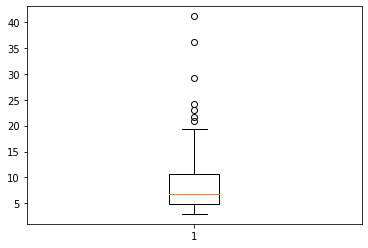

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.boxplot(top100_yr2010) # a boxplot of the top 100 emissions in year 2020

## Scatter plot


Scatter plot is often used to display the relationship between two variables (plot as x-y pairs). In this scatter plot example, we use [famous Iris data set](http://en.wikipedia.org/wiki/Iris_flower_data_set). The data is available [here](data/iris.csv). This data set provides measurements on various parts of three types of Iris flower (Iris setosa, Iris versicolour, and Iris virginica). For each type, there are 50 measurements, or samples. Each data row in the CSV file contains (1) sepal length, (2) sepal width, (3) petal length, (4) petal width, and (5) the type of Iris flower.

The following code generates the scatter plot between petal length and petal width of the three Iris types.

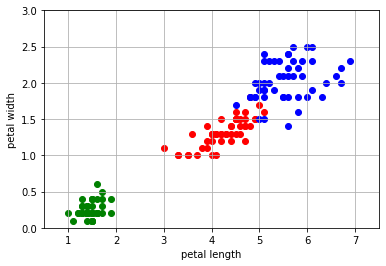

In [38]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

iris=pd.read_csv('data/iris.csv',encoding = 'ISO-8859-1',header=None)
setosa=iris.loc[iris[4]=='Iris-setosa']
versicolor=iris.loc[iris[4]=='Iris-versicolor']
virginica=iris.loc[iris[4]=='Iris-virginica']


plt.scatter(setosa.iloc[:,2],setosa.iloc[:,3],color='green')
plt.scatter(versicolor.iloc[:,2],versicolor.iloc[:,3],color='red')
plt.scatter(virginica.iloc[:,2],virginica.iloc[:,3],color='blue')
plt.xlim(0.5,7.5)
plt.ylim(0,3)
plt.ylabel("petal width")
plt.xlabel("petal length")
plt.grid(True)



From the scatter plot, we may be able to suggest a particular type of relationship or a formation of clusters. In the example above you may notice that, for Iris versicolor, the samples with longer petal tend to have wider petal. You can also see clearly that there exist clusters of these three Irises. As such, the measurements of petal and sepal can help identifying the type of Iris flower. This example demonstrates how botanists may indentify a certain species from phenotype characteristics.

### <span style="color:blue"> Exercise 4 </span> 


Modify the example above to generate the scatter plot of petal length and sepal length.


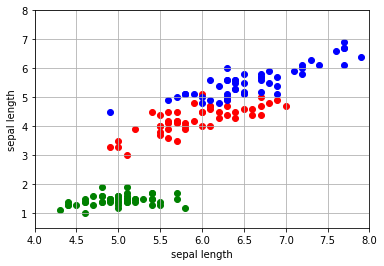

In [57]:
##answer here


#(0) sepal length, (1) sepal width, (2) petal length, (3) petal width, and (4) the type of Iris flower.


%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

iris=pd.read_csv('data/iris.csv',encoding = 'ISO-8859-1',header=None)
setosa=iris.loc[iris[4]=='Iris-setosa']
versicolor=iris.loc[iris[4]=='Iris-versicolor']
virginica=iris.loc[iris[4]=='Iris-virginica']




# index 2 is petal length, replace with index 0 for sepal length
plt.scatter(setosa.iloc[:,0],setosa.iloc[:,2],color='green')
plt.scatter(versicolor.iloc[:,0],versicolor.iloc[:,2],color='red')
plt.scatter(virginica.iloc[:,0],virginica.iloc[:,2],color='blue')
plt.xlim(4,8)
plt.ylim(0.5,8)
plt.ylabel("sepal length")
# change x lable to sepal length
plt.xlabel("sepal length")
plt.grid(True)





## Bar chart

Bar chart is probably the most common type of chart. It displays a property or properties of a set of different entities. Bar chart is typically used to provide comparison, or to show contrast between different entities. For example, the bar chart below displays the GNP per capita of the three poorest and the three richest countries in the world (based on 2004 GNP per capita):

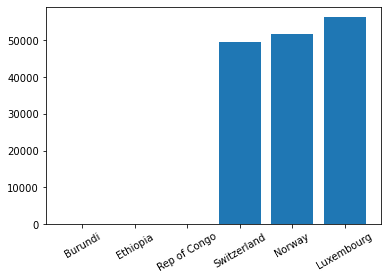

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import calendar
from numpy import arange

countries = ['Burundi','Ethiopia','Rep of Congo','Switzerland','Norway','Luxembourg']
gnp = [90,110,110,49600,51810,56380] # GNP per capita (2004)
plt.bar(arange(len(gnp)),gnp)
plt.xticks( arange(len(countries)),countries, rotation=30)
plt.show()

### <span style="color:blue"> Exercise 5 </span> 


Modify the bar chart example to plot the average maximum temperature in all major Australian cities. The data is available [here](data/max_temp.csv). 


In [53]:
##answer here

tmp = pd.read_csv('data/max_temp.csv',encoding = 'ISO-8859-1')
city_avg_tmp = tmp.iloc[:,1:].mean(axis=1)
city_avg_tmp
city = tmp.iloc[:,0]


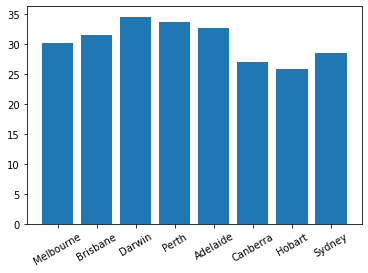

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import calendar
from numpy import arange

plt.bar(arange(len(city)),city_avg_tmp)
plt.xticks( arange(len(city)),city, rotation=30)
plt.show()

In a clustered bar chart, you can display a few measurements from the entities of interest. For example, the clustered bar chart below simultaneously shows the number of births and deaths in four countries of interest. The number of births is displayed as the blue-colored bar and the number of deaths as the red-colored bar:

([<matplotlib.axis.XTick at 0x1c907aad080>,
 [Text(0, 0, 'Afghanistan'),
  Text(0, 0, 'Albania'),
  Text(0, 0, 'Algeria'),
  Text(0, 0, 'Angola')])

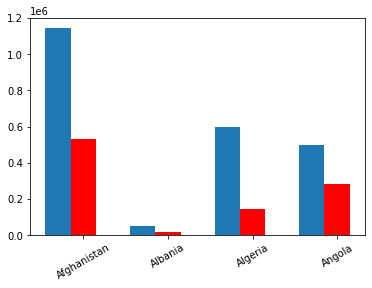

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import calendar
from numpy import arange

countries = ['Afghanistan', 'Albania', 'Algeria', 'Angola']
births = [1143717, 53367, 598519, 498887]
deaths = [529623, 16474, 144694, 285380]
plt.bar(arange(len(births))-0.3, births, width=0.3)
plt.bar(arange(len(deaths)),deaths, width=0.3,color='r')
plt.xticks(arange(len(countries)),countries, rotation=30)

## Histogram

Histogram displays a distribution of population samples (typically a large set of data like digital images or age of population). The following example creates a histogram of age within a small number of samples (assumes these are the age of your classmates).

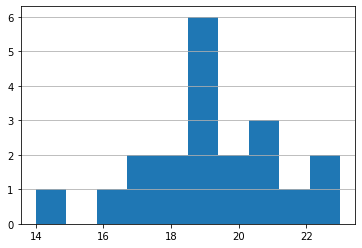

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt


ages = [17,18,18,19,21,19,19,21,20,23,19,22,20,21,19,19,14,23,16,17]
plt.hist(ages, bins=10)
plt.grid(which='major', axis='y')
plt.show()

### <span style="color:blue"> Exercise 6 </span> 


Change the number of bins in the previous example to 20.
Plot the histogram


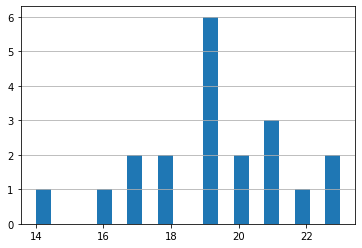

In [45]:
# answer here
%matplotlib inline
import matplotlib.pyplot as plt

ages = [17,18,18,19,21,19,19,21,20,23,19,22,20,21,19,19,14,23,16,17]

plt.hist(ages, bins=20)
plt.grid(which='major', axis='y')
plt.show()
